# Data Analysis Project 

In [2]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [3]:
# Load the Data
df = pd.read_csv('data2.csv',encoding='unicode_escape') # To avoid encoding error
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [4]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


# Basic Data Cleaning

In [5]:
# Drop the column
df.drop(['Status','unnamed1'],axis=1,inplace=True)


In [6]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [7]:
# Drop null Values
df.dropna(inplace=True)

In [8]:
# Change data type of Amount Column
df['Amount'] = df['Amount'].astype(int)

In [9]:
# Check data type
df['Amount'].dtype

dtype('int32')

In [10]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [11]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


# Exploratory Data Analysis (EDA)

### Gender

In [12]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

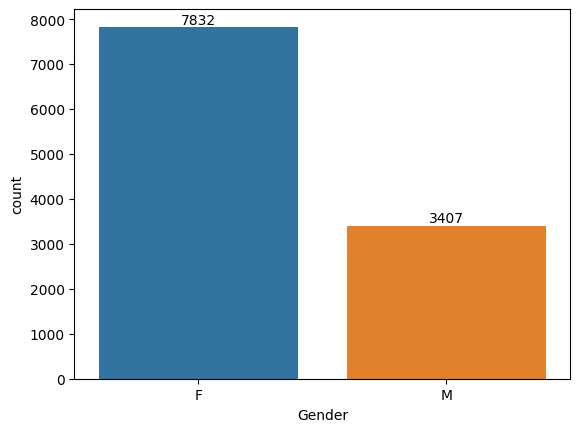

In [13]:
ax = sns.countplot(x = 'Gender',data = df)

for bars in ax.containers:
    ax.bar_label(bars)

In [14]:
df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by = 'Amount',ascending=False)

,Gender,Amount
0,F,74335853
1,M,31913276


<Axes: xlabel='Gender', ylabel='Amount'>

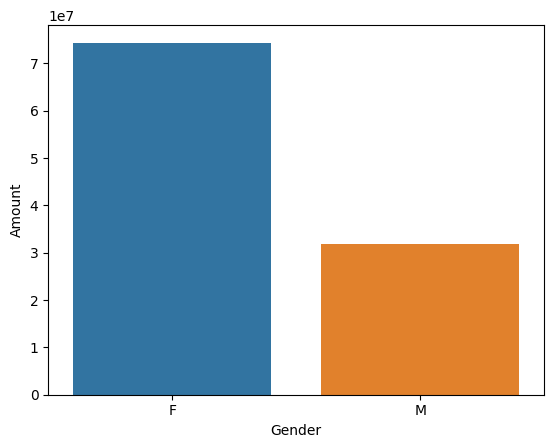

In [15]:
Sales_gen = df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by = 'Amount',ascending=False)
sns.barplot(x= "Gender", y= 'Amount', data = Sales_gen)

From Above graph we can see that most of the buyers are Female and even the purchasing poer of Females are greater the men.

### Age group

In [16]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

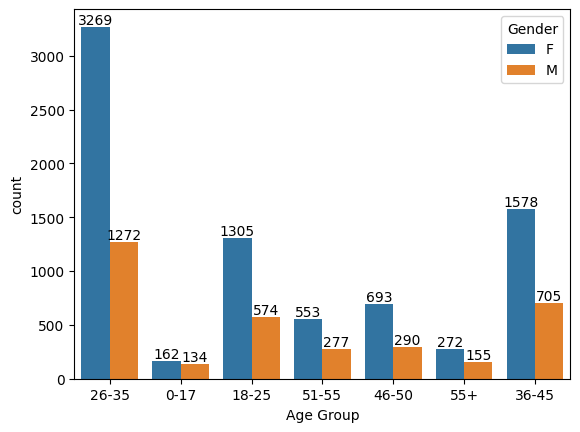

In [17]:
ax = sns.countplot ( data = df, x='Age Group', hue = 'Gender')
for bars in ax.containers:
    ax.bar_label(bars)


<Axes: xlabel='Age Group', ylabel='Amount'>

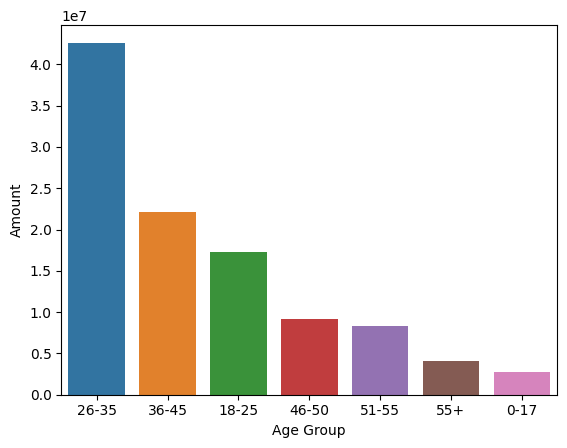

In [18]:
Sales_age = df.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by = 'Amount',ascending=False)
sns.barplot(x= "Age Group", y= 'Amount', data = Sales_age)

From above graph we can see that most of the buyers are of age group between 26-35 years Females.

### State

In [19]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

Text(0.5, 1.0, 'Total number of Orders from top 10 States')

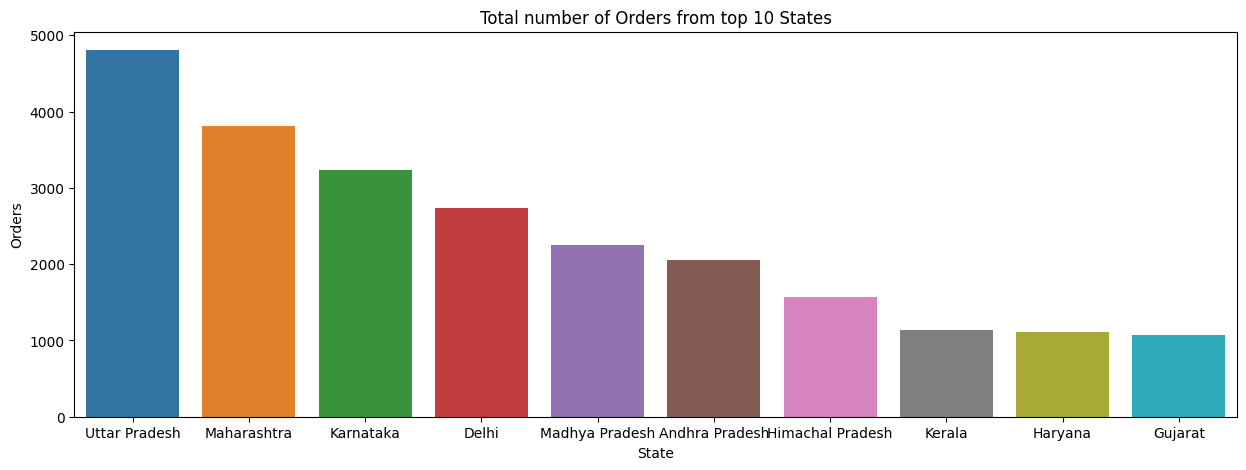

In [20]:
# Total number of Orders from top 10 States
Sales_state = df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by= 'Orders',ascending=False).head(10)

fig = plt.figure(figsize=(15,5))
sns.barplot(data = Sales_state, x='State',y = 'Orders')
plt.title('Total number of Orders from top 10 States')

Text(0.5, 1.0, 'Total number of Amount from top 10 States')

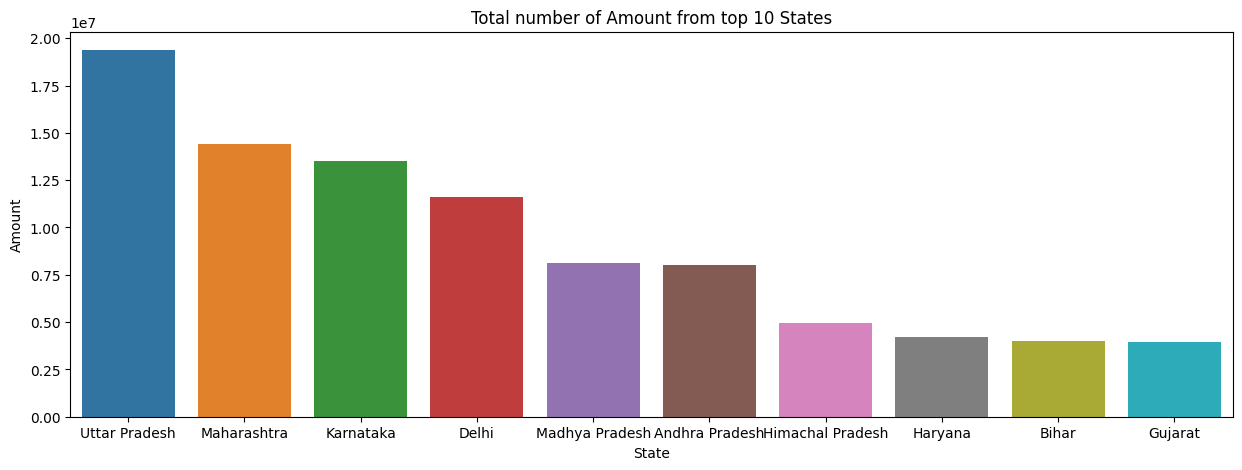

In [22]:
# Total Amount/Sales from top 10 States
Sales_state = df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by= 'Amount',ascending=False).head(10)

fig = plt.figure(figsize=(15,5))
sns.barplot(data = Sales_state, x='State',y = 'Amount')
plt.title('Total number of Amount from top 10 States')

From above graph we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharastra and Karnataka.

### Marital Status

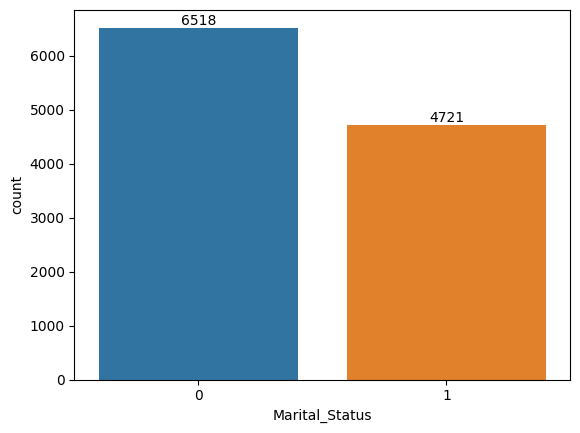

In [23]:
ax = sns.countplot(data = df, x = 'Marital_Status')
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

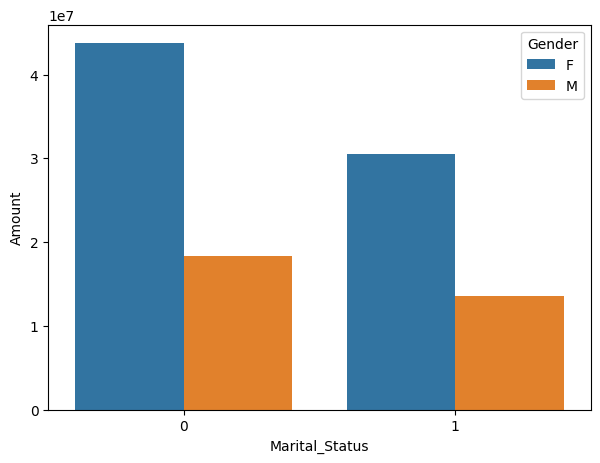

In [26]:
Sales_state = df.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(by= 'Amount',ascending=False).head(10)

fig = plt.figure(figsize=(7,5))
sns.barplot(data = Sales_state, x='Marital_Status',y = 'Amount',hue = 'Gender')


From above graph we can see that most of the buyers are married women and they have high purchasing power.

### Occupation

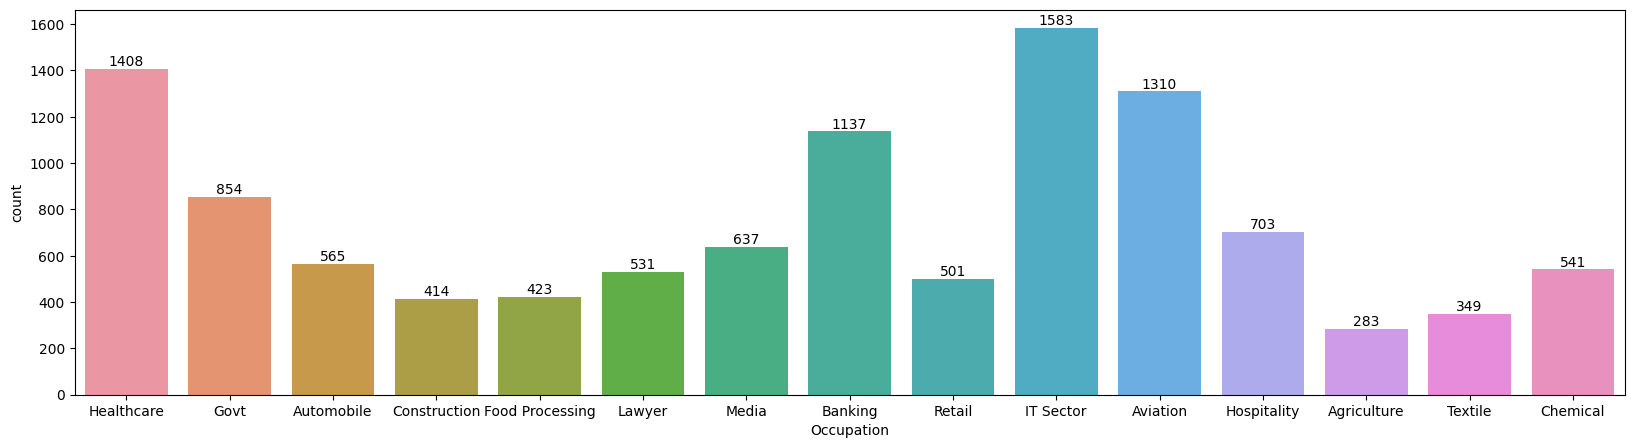

In [27]:
fig = plt.figure(figsize=(20,5))
ax = sns.countplot(data = df, x = 'Occupation')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

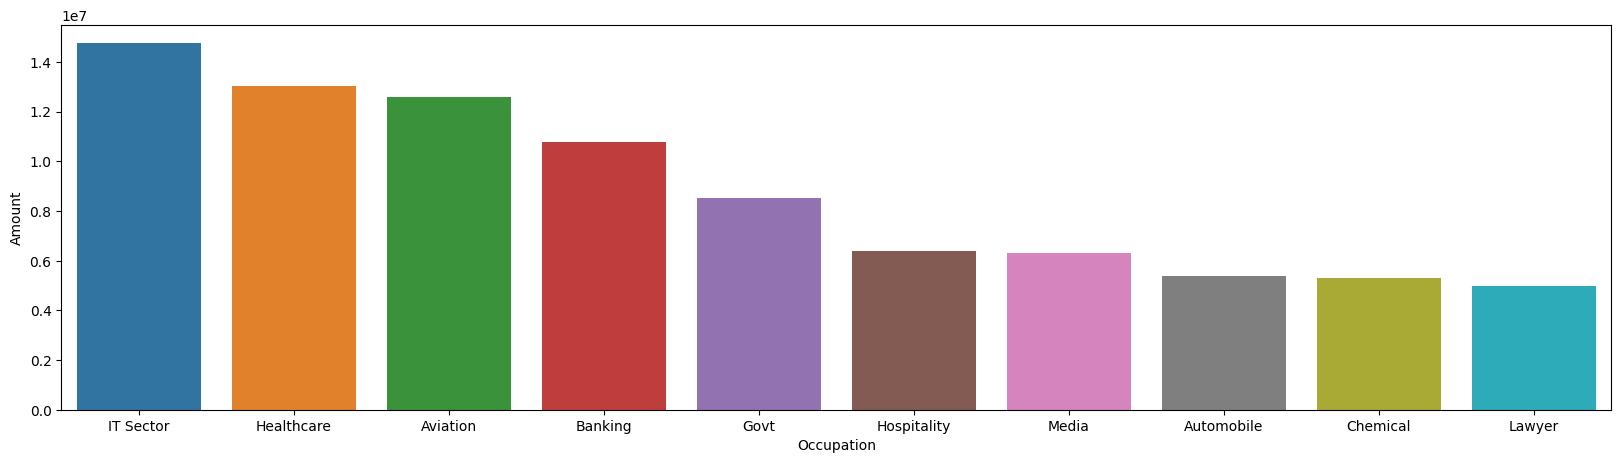

In [28]:
Sales_state = df.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by= 'Amount',ascending=False).head(10)

fig = plt.figure(figsize=(20,5))
sns.barplot(data = Sales_state, x='Occupation',y = 'Amount')

From above graph we can see that most of the buyers are working to IT, Healthcare and Aviation Secter.

### Product Category


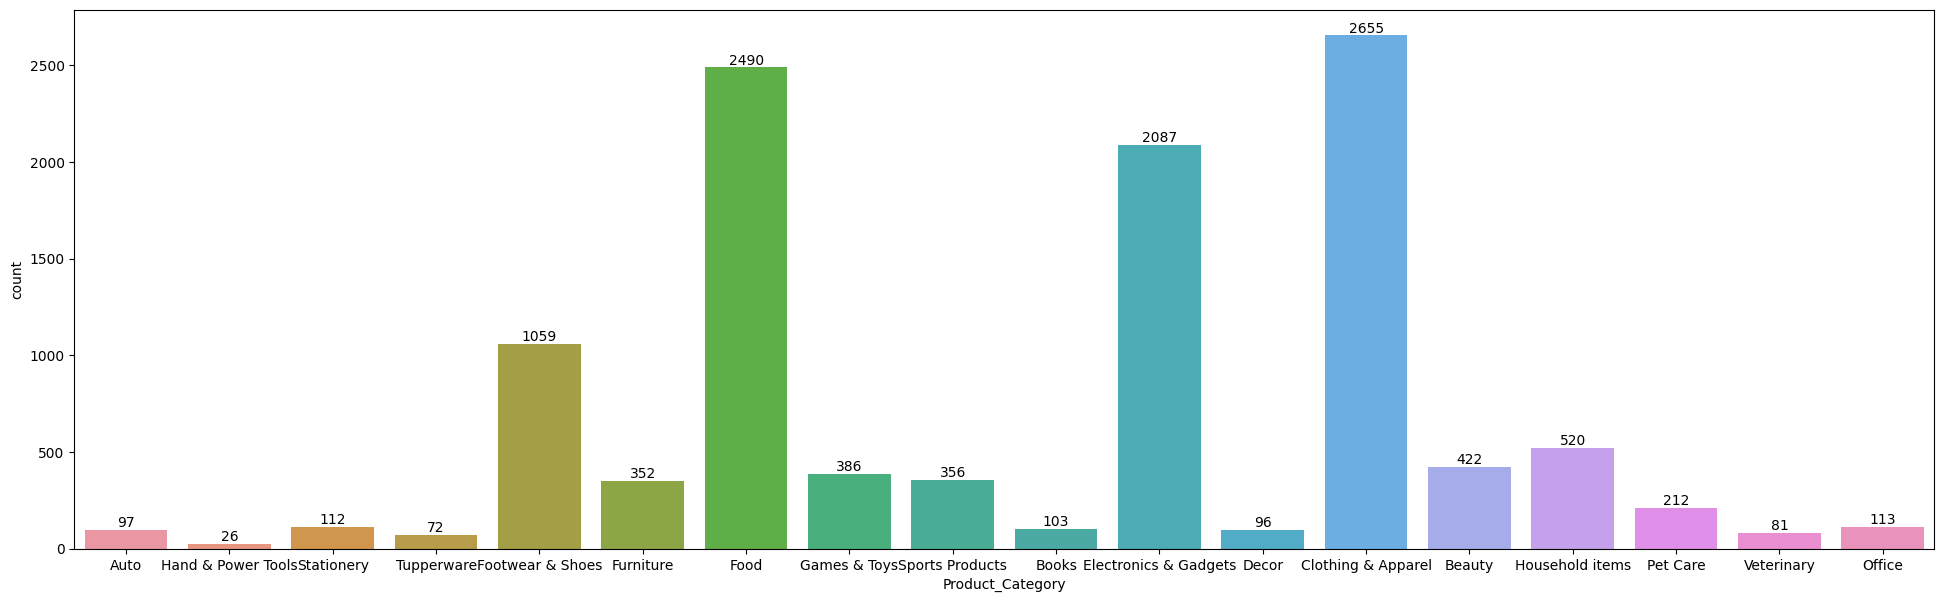

In [31]:
fig = plt.figure(figsize=(24,7))
ax = sns.countplot(data = df, x = 'Product_Category')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

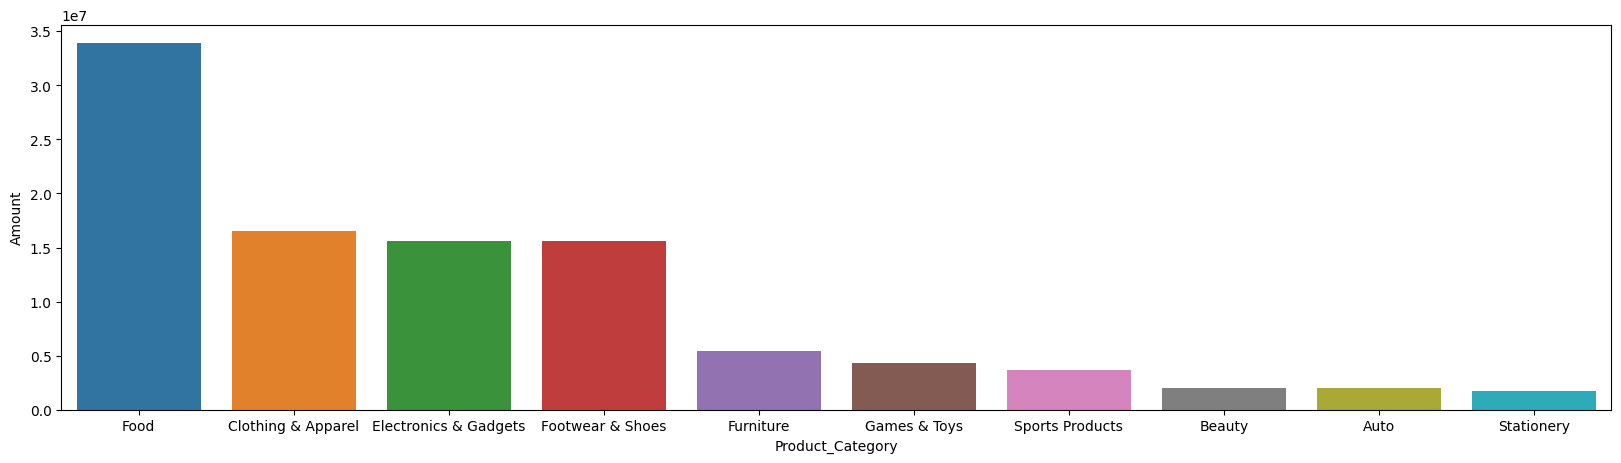

In [32]:
Sales_state = df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by= 'Amount',ascending=False).head(10)

fig = plt.figure(figsize=(20,5))
sns.barplot(data = Sales_state, x='Product_Category',y = 'Amount')

From above graph we can see that most of the sold products are from Food, Clothing & Apparel and Electronics & Gadgets.

<Axes: xlabel='Product_ID', ylabel='Orders'>

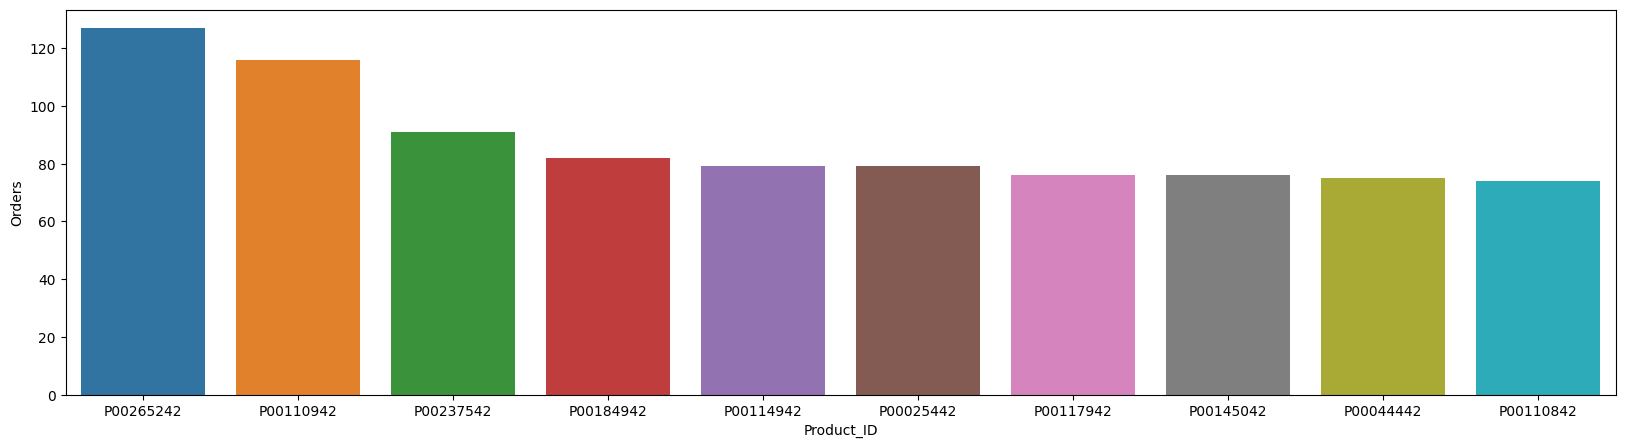

In [33]:
Sales_state = df.groupby(['Product_ID'],as_index=False)['Orders'].sum().sort_values(by= 'Orders',ascending=False).head(10)

fig = plt.figure(figsize=(20,5))
sns.barplot(data = Sales_state, x='Product_ID',y = 'Orders')

## Conclusion:
Married women age group 26-35 years from UP,Maharastra and Karnataka working in IT,Healthcare and Aviation are more likely to buy products from Food,Clothing and Electronics category.